# Compute function inverse via collocation

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demapp08.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Oct-22</i>
<hr>

## About

The function is defined implicitly by
\begin{equation*}
f(x)^{-2} + f(x)^{-5} - 2x = 0
\end{equation*}

### Initial tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, NLP

### Approximation structure

In [2]:
n, a, b = 31, 1, 5
F = BasisChebyshev(n, a, b, y=5*np.ones(n), labels=['f(x)'])  # define basis functions
x = F.nodes                  # compute standard nodes

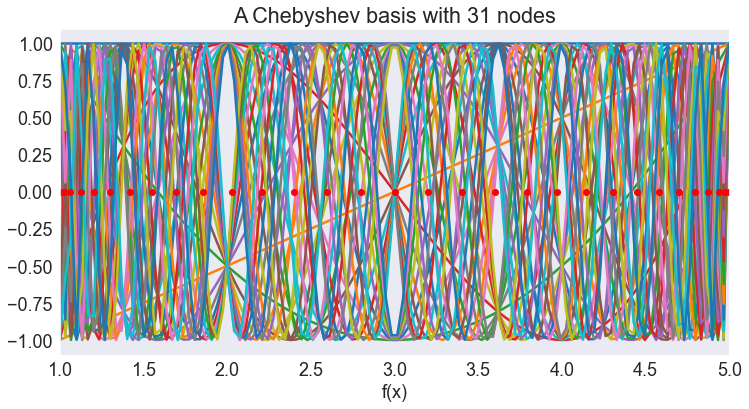

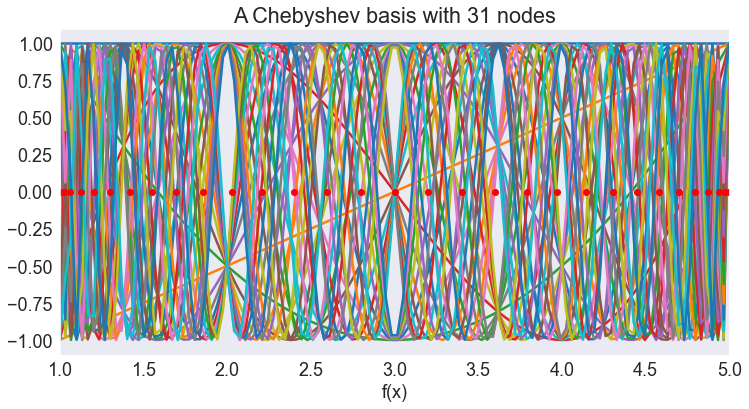

In [3]:
F.plot()

### Residual function

In [4]:
def resid(c):
    F.c = c  # update basis coefficients
    y = F(x) # interpolate at basis nodes x
    return y ** -2 + y ** -5 - 2 * x

### Compute function inverse

In [5]:
c0 = np.zeros(n)  # set initial guess for coeffs
c0[0] = 0.2
problem = NLP(resid)
F.c = problem.broyden(c0)  # compute coeff by Broyden's method

### Plot function inverse

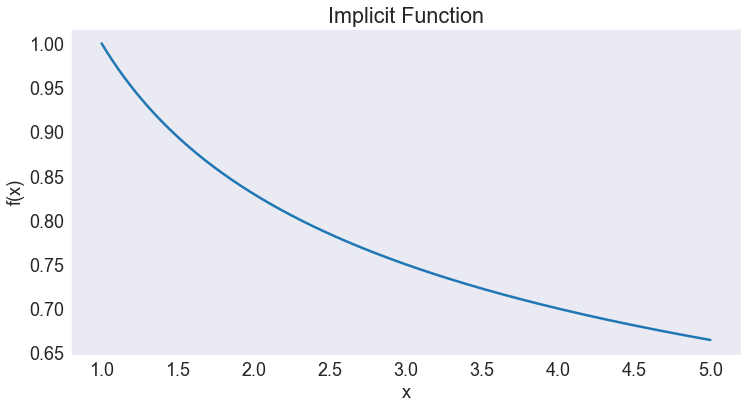

In [6]:
n = 1000
x = np.linspace(a, b, n)
r = resid(F.c)

fig1, ax = plt.subplots()
ax.set(title='Implicit Function', 
       xlabel='x',
       ylabel='f(x)')
ax.plot(x, F(x));

### Plot residual

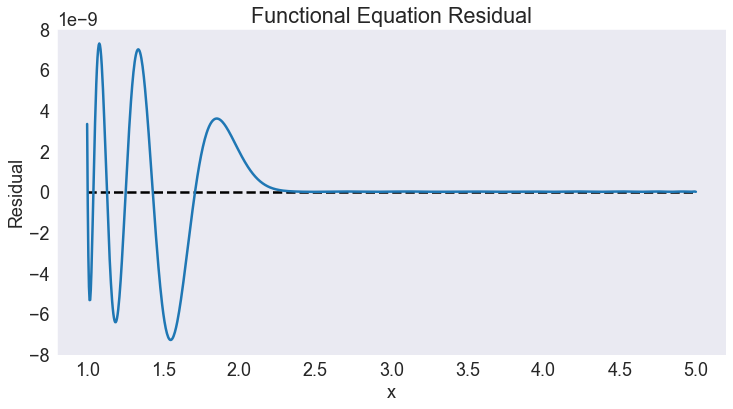

In [7]:
fig2, ax = plt.subplots()
ax.set(title='Functional Equation Residual',
         xlabel='x',
         ylabel='Residual')
ax.hlines(0, a, b, 'k', '--')
ax.plot(x, r);